In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
opioid_prescription = "Resources/Opioid_prescription_data.csv"

# read as df
opioid_df = pd.read_csv(opioid_prescription)

In [59]:
opioid_df.head()

,FIPS,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
0,2050,AK,BETHEL,NaN,NaN,NaN,NaN
1,2068,AK,DENALI,NaN,NaN,NaN,NaN
2,2013,AK,ALEUTIANS EAST,NaN,NaN,NaN,NaN
3,2016,AK,ALEUTIANS WEST,NaN,NaN,NaN,NaN
4,2240,AK,SOUTHEAST FAIRBANKS,NaN,NaN,NaN,NaN


In [4]:
# clean data (drop NA, remove unecessary columns)
opioid_df=opioid_df.drop(columns=['FIPS'])
opioid_df=opioid_df.dropna()
opioid_df

,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
17,AK,KENAI PENINSULA,1362.1,1343.7,4.0,Stable
18,AK,MATANUSKA SUSITNA,930.4,869.3,3.0,Stable
19,AK,ANCHORAGE,863.8,808.9,3.0,Stable
20,AK,KETCHIKAN GATEWAY,817.4,731.1,3.0,Decreased
21,AK,PETERSBURG,1017.7,682.9,3.0,Decreased
...,...,...,...,...,...,...
3137,WY,ALBANY,458.4,410.9,1.0,Decreased
3138,WY,TETON,406.3,387.8,1.0,Stable
3139,WY,CAMPBELL,581.7,384.7,1.0,Decreased
3140,WY,GOSHEN,601.4,375.4,1.0,Decreased


In [19]:
# Groupby state
prescription_by_state=opioid_df.groupby(['State'])['MME_PerCap_2010','MME_PerCap_2015'].sum()
state_df=pd.DataFrame(prescription_by_state)
#reset index
state_df=state_df.reset_index()
state_df.head()

,State,MME_PerCap_2010,MME_PerCap_2015
0,AK,7400.0,6097.7
1,AL,61744.7,63231.0
2,AR,61462.1,59221.7
3,AZ,14909.2,13493.5
4,CA,59583.8,47343.8


In [20]:
number_days_prescription_2010=state_df['MME_PerCap_2010'].div(48.1)
number_days_prescription_2015=state_df['MME_PerCap_2015'].div(48.1)
state_df['Number of Days of Prescriptions 2010'] = number_days_prescription_2010
state_df['Number of Days of Prescriptions 2015'] = number_days_prescription_2015
state_df.head()

,State,MME_PerCap_2010,MME_PerCap_2015,Number of Days of Prescriptions 2010,Number of Days of Prescriptions 2015
0,AK,7400.0,6097.7,153.846154,126.771310
1,AL,61744.7,63231.0,1283.673597,1314.573805
2,AR,61462.1,59221.7,1277.798337,1231.220374
3,AZ,14909.2,13493.5,309.962578,280.530146
4,CA,59583.8,47343.8,1238.748441,984.278586


# About this Dataset
- The opioid prescription amounts were are originally measured in MME (Morphine Milligram Equivalents) per capita in each county.  They have been changed to number of days prescriptions per person in each state by dividing by 48.1 (the national average daily MME) for easier understanding.

# Barchart Analyzing Opioid Prescription Amounts in Each State

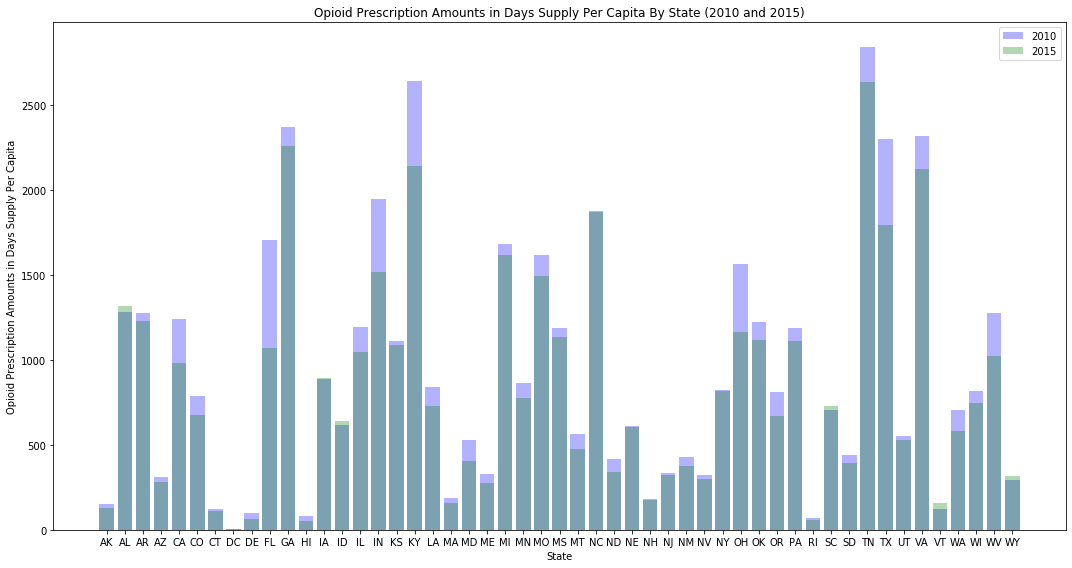

In [57]:
#create barchart
plt.figure(figsize=(15,8))
data_2010 =plt.bar(state_df["State"],state_df["Number of Days of Prescriptions 2010"], color="blue",alpha=.3, label="2010")
data_2015 =plt.bar(state_df["State"],state_df["Number of Days of Prescriptions 2015"], color="g", alpha=.3, label="2015")
plt.title("Opioid Prescription Amounts in Days Supply Per Capita By State (2010 and 2015)")
plt.ylabel("Opioid Prescription Amounts in Days Supply Per Capita")
plt.xlabel("State")
plt.tight_layout()
plt.legend(handles=[data_2010, data_2015], loc="best")
plt.show()